<h3>1. Вывести информацию в консоль о логических дисках, именах, метке тома, размере и типе файловой системы.</h3>

<h5>Решение</h5>

In [172]:
import psutil

disk = psutil.disk_partitions() 

for d in disk: 
    name = d[0] 
    typeFs = d[2] 
    used = psutil.disk_usage(d[0]).total 
    free = psutil.disk_usage(d[0]).free 

    print("Name: ", name) 
    print("Type: ", typeFs) 
    print("Volume: ", round(used/1024/1024/1024, 2), " Gb") 
    print("Free: ", round(free/1024/1024/1024, 2), " Gb\n")
    

Name:  /dev/disk1s5s1
Type:  apfs
Volume:  0.0  Gb
Free:  0.0  Gb

Name:  /dev/disk1s4
Type:  apfs
Volume:  0.0  Gb
Free:  0.0  Gb

Name:  /dev/disk1s2
Type:  apfs
Volume:  0.0  Gb
Free:  0.0  Gb

Name:  /dev/disk1s6
Type:  apfs
Volume:  0.0  Gb
Free:  0.0  Gb

Name:  /dev/disk1s1
Type:  apfs
Volume:  0.0  Gb
Free:  0.0  Gb



<h5>Результат</h5>

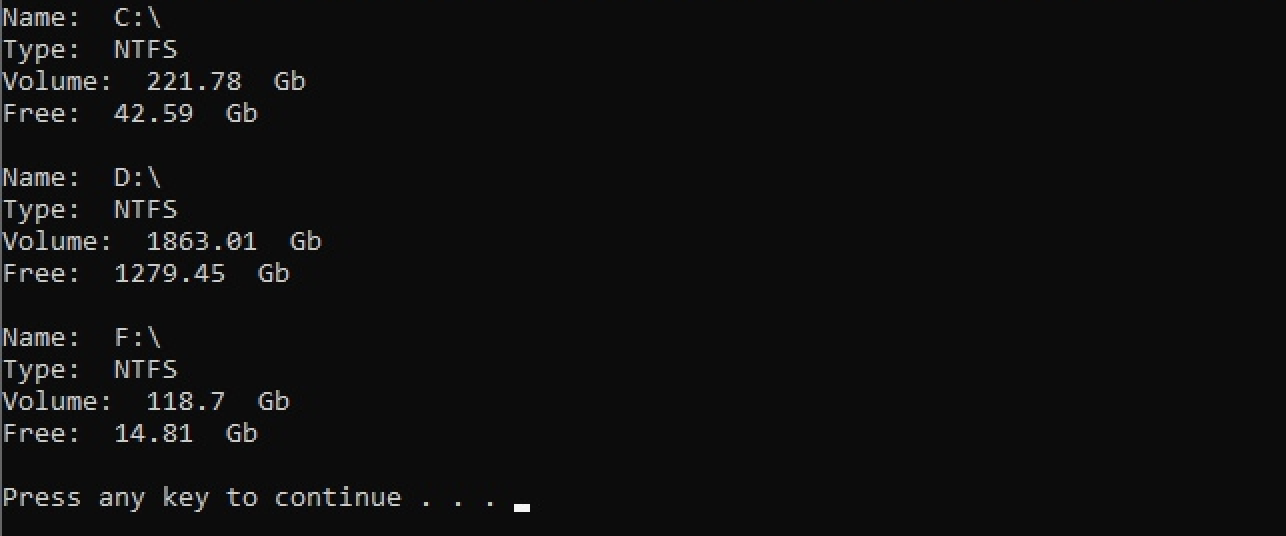

<h3>2. Работа с файлами ( класс File, FileInfo, FileStream и другие)</h3>
<ul style="list-style: decimal">
    <li>Создать файл</li>
    <li>Записать в файл строку, введённую пользователем</li>
    <li>Прочитать файл в консоль</li>
    <li>Удалить файл</li>
</ul>

<h5>Решение</h5>

In [48]:
import os

f = open('text.txt', mode="w")
some_data = input("Введите строку: ")
print(some_data, file=f)
f.close()

f = open('text.txt', mode="r")
print("Вывод: " + f.read())
f.close()

path = os.path.join(os.path.abspath(os.path.dirname('text.txt')), 'text.txt')
os.remove(path)

Введите строку: Сегодня шёл снег.
Вывод: Сегодня шёл снег.



<h5>Результат</h5>

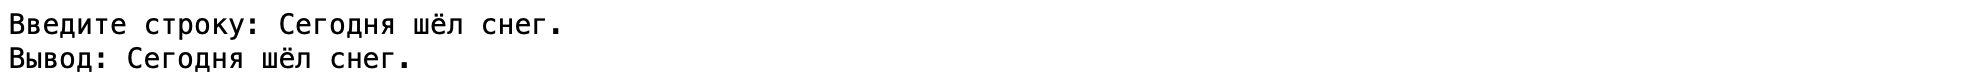

<h3>3. Работа с форматом JSON</h3>
<ul style="list-style: decimal">
    <li>Создать файл формате JSON в любом редакторе или с использованием данных, введенных пользователем</li>
    <li>Создать новый объект. Выполнить сериализацию объекта в формате JSON и записать в файл.</li>
    <li>Прочитать файл в консоль</li>
    <li>Удалить файл</li>
</ul>

<h5>Решение</h5>

In [3]:
import json
import os

info = {
    "auxiliaryFields": {
        "key" : "mail",
        "label" : "mail",
        "value" : "mailexample@mail.ru"
    }
}

inf = open('pass.json',)
res = json.load(inf)
print(res)
inf.close()

res = res | info
with open( "pass.json" , "w+" ) as x:
    json.dump( res , x )

print(res)

path = os.path.join(os.path.abspath(os.path.dirname('pass.json')), 'pass.json')
os.remove(path)

{'primaryFields': {'key': 'member', 'value': 'Tim Cook'}, 'auxiliaryFields': {'key': 'mail', 'label': 'mail', 'value': 'mailexample@mail.ru'}}
{'primaryFields': {'key': 'member', 'value': 'Tim Cook'}, 'auxiliaryFields': {'key': 'mail', 'label': 'mail', 'value': 'mailexample@mail.ru'}}


<h5>Результат</h5>

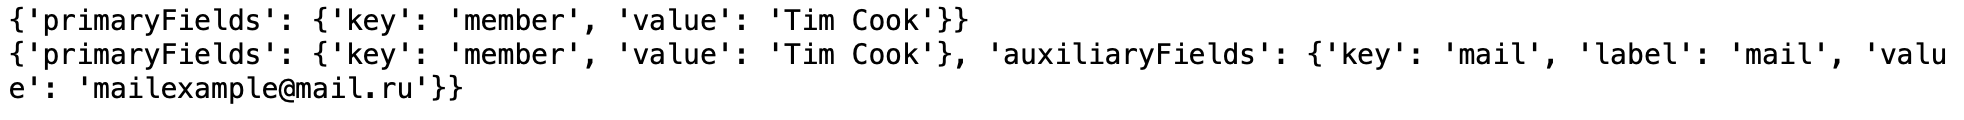

<h3>4. Работа с форматом XML</h3>
<ul style="list-style: decimal">
    <li>Создать файл формате XML из редактора</li>
    <li>Записать в файл новые данные из консоли</li>
    <li>Прочитать файл в консоль</li>
    <li>Удалить файл</li>
</ul>

<h5>Решение</h5>

In [4]:
import xml.etree.ElementTree as ET
import os

point = True

tree = ET.parse('sample.xml') #необходимо наличие файла
root=tree.getroot()
ET.dump(root)

while point:
    
    c = ET.SubElement(root, 'user')
    
    name = input("Имя: ")
    c.set('name', name)
    
    company = input("Место работы: ")
    c.set('company', company)
    
    age = input("Возраст: ")
    c.set('age', age)
    
    point = False if (int(input("Продолжить?(1/0): ")) == 0) else True
    print('\n')
    
ET.dump(root)
tree.write("sample.xml")

path = os.path.join(os.path.abspath(os.path.dirname('sample.xml')), 'sample.xml')
os.remove(path)


<users><user name="Larry Page" company="Google" age="48" /><user name="Bill Gates" company="Microsoft" age="48" /></users>
Имя: A B
Место работы: C
Возраст: 46
Продолжить?(1/0): 0


<users><user name="Larry Page" company="Google" age="48" /><user name="Bill Gates" company="Microsoft" age="48" /><user name="A B" company="C" age="46" /></users>


<h5>Результат</h5>

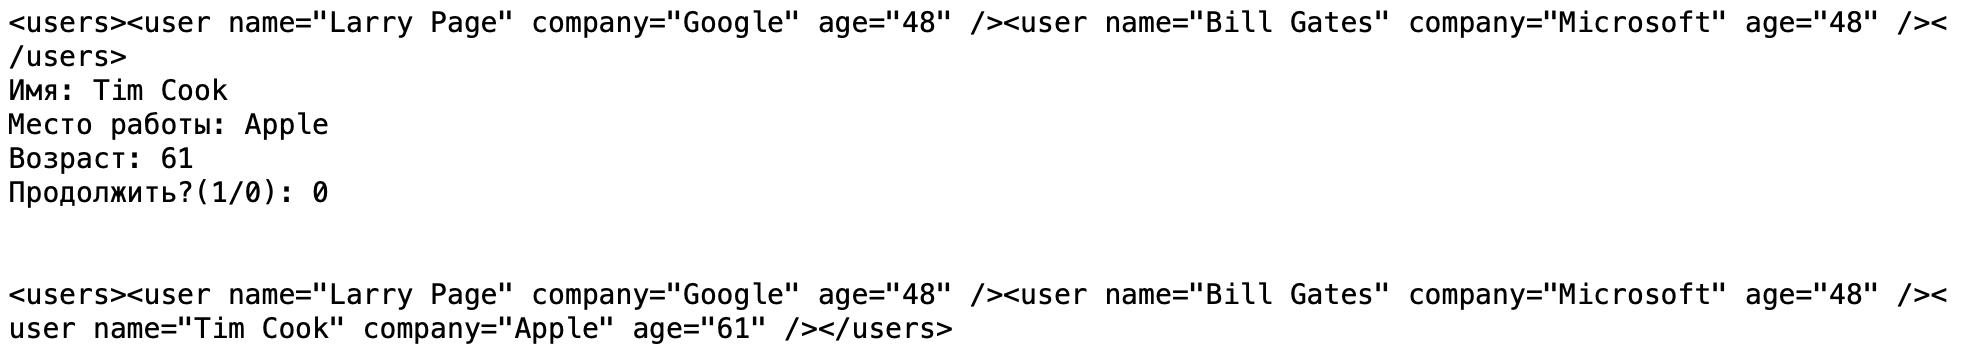

<h3>5. Создание zip архива, добавление туда файла, определение размера архива</h3>
<ul style="list-style: decimal">
    <li>Создать архив в форматер zip</li>
    <li>Добавить файл, выбранный пользователем, в архив</li>
    <li>Разархивировать файл и вывести данные о нем</li>
    <li>Удалить файл и архив</li>
</ul>





<h5>Решение</h5>

In [140]:
import zipfile
import os

name = input("Введите название файла: ")

if path.exists(name):

    jungle_zip = zipfile.ZipFile('archive.zip', 'w')
    jungle_zip.write(name, compress_type=zipfile.ZIP_DEFLATED)
    jungle_zip.close()
    
    input("\nСоздан архив")
    
    src = path.realpath(name)
    os.remove(src)
    
    fantasy_zip = zipfile.ZipFile('archive.zip')
    fantasy_zip.extract(name)
    fantasy_zip.close()
    
    input("\nФайл извлечен")
    
    print("\nСодержимое файла:")
    with open(name, "r") as x:
        print(x.read())
        
    srca = path.realpath('archive.zip')
    os.remove(srca)
    os.remove(src)
    
    input("\nВсё удалено")
    

Введите название файла: example.txt

Создан архив;

Файл извлечен;

Содержимое файла:
Сегодня шёл снег.


Всё удалено!


<h5>Результат</h5>

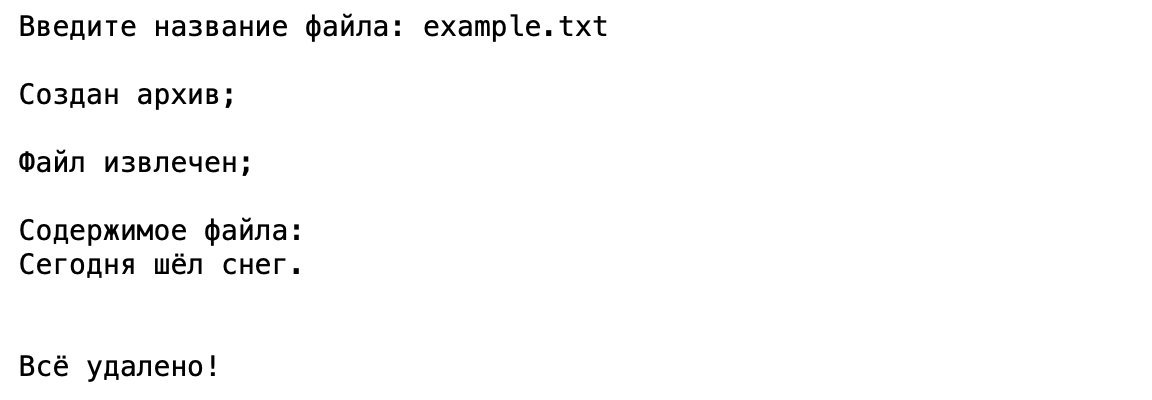